# 4. Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("LogisticRegressionData.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습 (로지스틱 회귀 모델)

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() # 분류
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 예측?

In [5]:
classifier.predict([[6]]) # 6시간 공부 했을 때 합격할 것 이라고 예측함

array([1])

In [7]:
classifier.predict_proba([[6]]) # 합격할 확률 정보
# 불합격할 확률 : 14.1%, 합격할 확률 : 85.8

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측?

In [6]:
classifier.predict([[4]]) # 4시간 공부 했을 때 합격할 것 이라고 예측함

array([0])

In [8]:
classifier.predict_proba([[4]]) # 합격할 확률 정보
# 불합격할 확률 : 62.5, 합격할 확률 : 37.5

array([[0.6249966, 0.3750034]])

### 분류 결과 예측(테스트 세트)

In [13]:
y_pred = classifier.predict(X_test)
y_pred # 예측 값

array([1, 0, 1, 1])

In [14]:
y_test # 실제 값

array([1, 0, 1, 0])

In [15]:
X_test # 공부시간

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [16]:
classifier.score(X_test, y_test) # 모델 평가 3/4

0.75

### 데이터 시각화(훈련 세트)

In [17]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [22]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) # y = mx + b
p.shape

(1, 95)

In [24]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

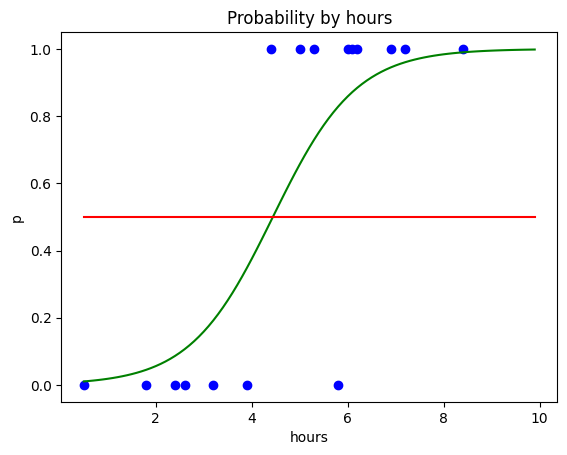

In [25]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_range, p, color="green")
plt.plot(X_range, np.full(len(X_range), 0.5), color="red")
plt.title("Probability by hours")
plt.xlabel("hours")
plt.ylabel("p")
plt.show()

### 데이터 시각화(테스트 세트)

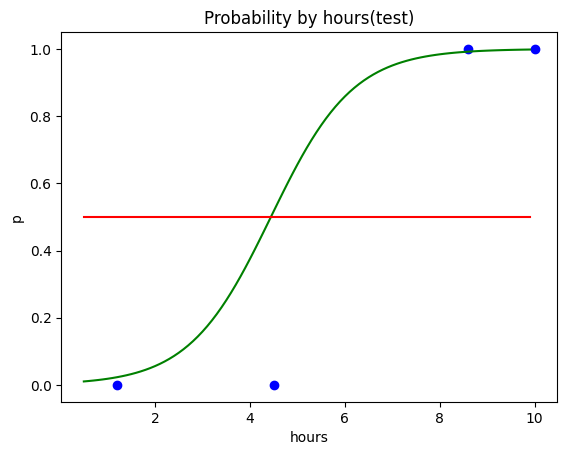

In [27]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_range, p, color="green")
plt.plot(X_range, np.full(len(X_range), 0.5), color="red")
plt.title("Probability by hours(test)")
plt.xlabel("hours")
plt.ylabel("p")
plt.show()

In [28]:
classifier.predict_proba([[4.5]]) # 4.5시간 공부했을 때의 합격 확률

array([[0.48310686, 0.51689314]])